# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Airbnb :-  Airbnb Inc. is an American San Francisco-based company operating an online marketplace for short- and long-term homestays and experiences.

Airbnb is a unique and widely recognized service that relies heavily on data analysis to make crucial business decisions. With millions of listings available on the platform, there is a vast amount of data that needs to be explored and analyzed to gain key insights. This data is used to enhance security, understand customer and host behavior, guide marketing initiatives, and implement innovative additional services. The dataset contains approximately 49,000 observations, with 16 columns consisting of both categorical and numeric values. Through exploration and analysis of this data, important understandings can be discovered.

# **GitHub Link -**

https://github.com/Varinder-KM/AirBnb-Bookings-Analysis-EDA

# **Problem Statement**


Perform Exploratory Data Analysis on the Dataset to get useful Insights

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import folium
from folium.plugins import FastMarkerCluster

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 1 - Python For Data Science/Capstone Project: EDA/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Rows Count:', dataset.shape[0])
print('Columns Count:', dataset.shape[1])

Rows Count: 48895
Columns Count: 16


### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Visualizing the missing values
missing_df = dataset.isna().sum()

In [ ]:
missing_df = missing_df*100/dataset.shape[0]

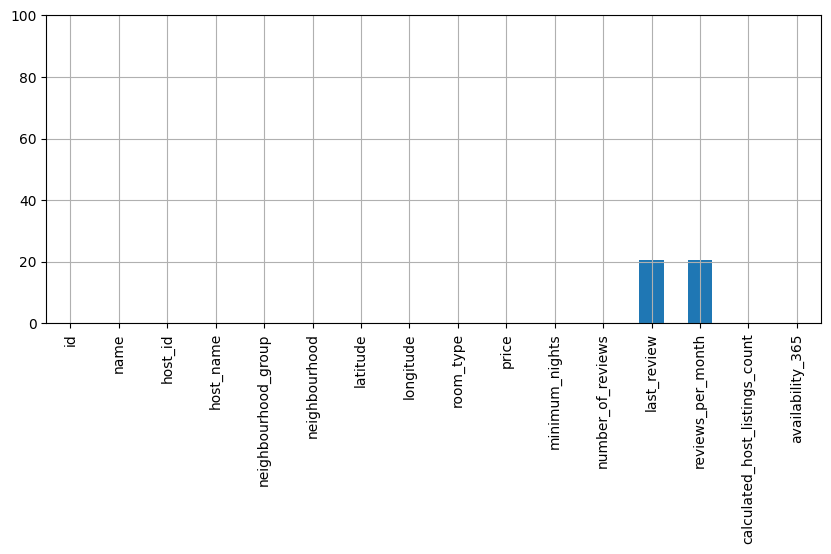

In [ ]:

fig, ax = plt.subplots(figsize=(10, 4))
missing_df.plot(kind='bar', ax=ax)
ax.set_ylim((0,100))
ax.grid()
plt.show()

<Axes: >

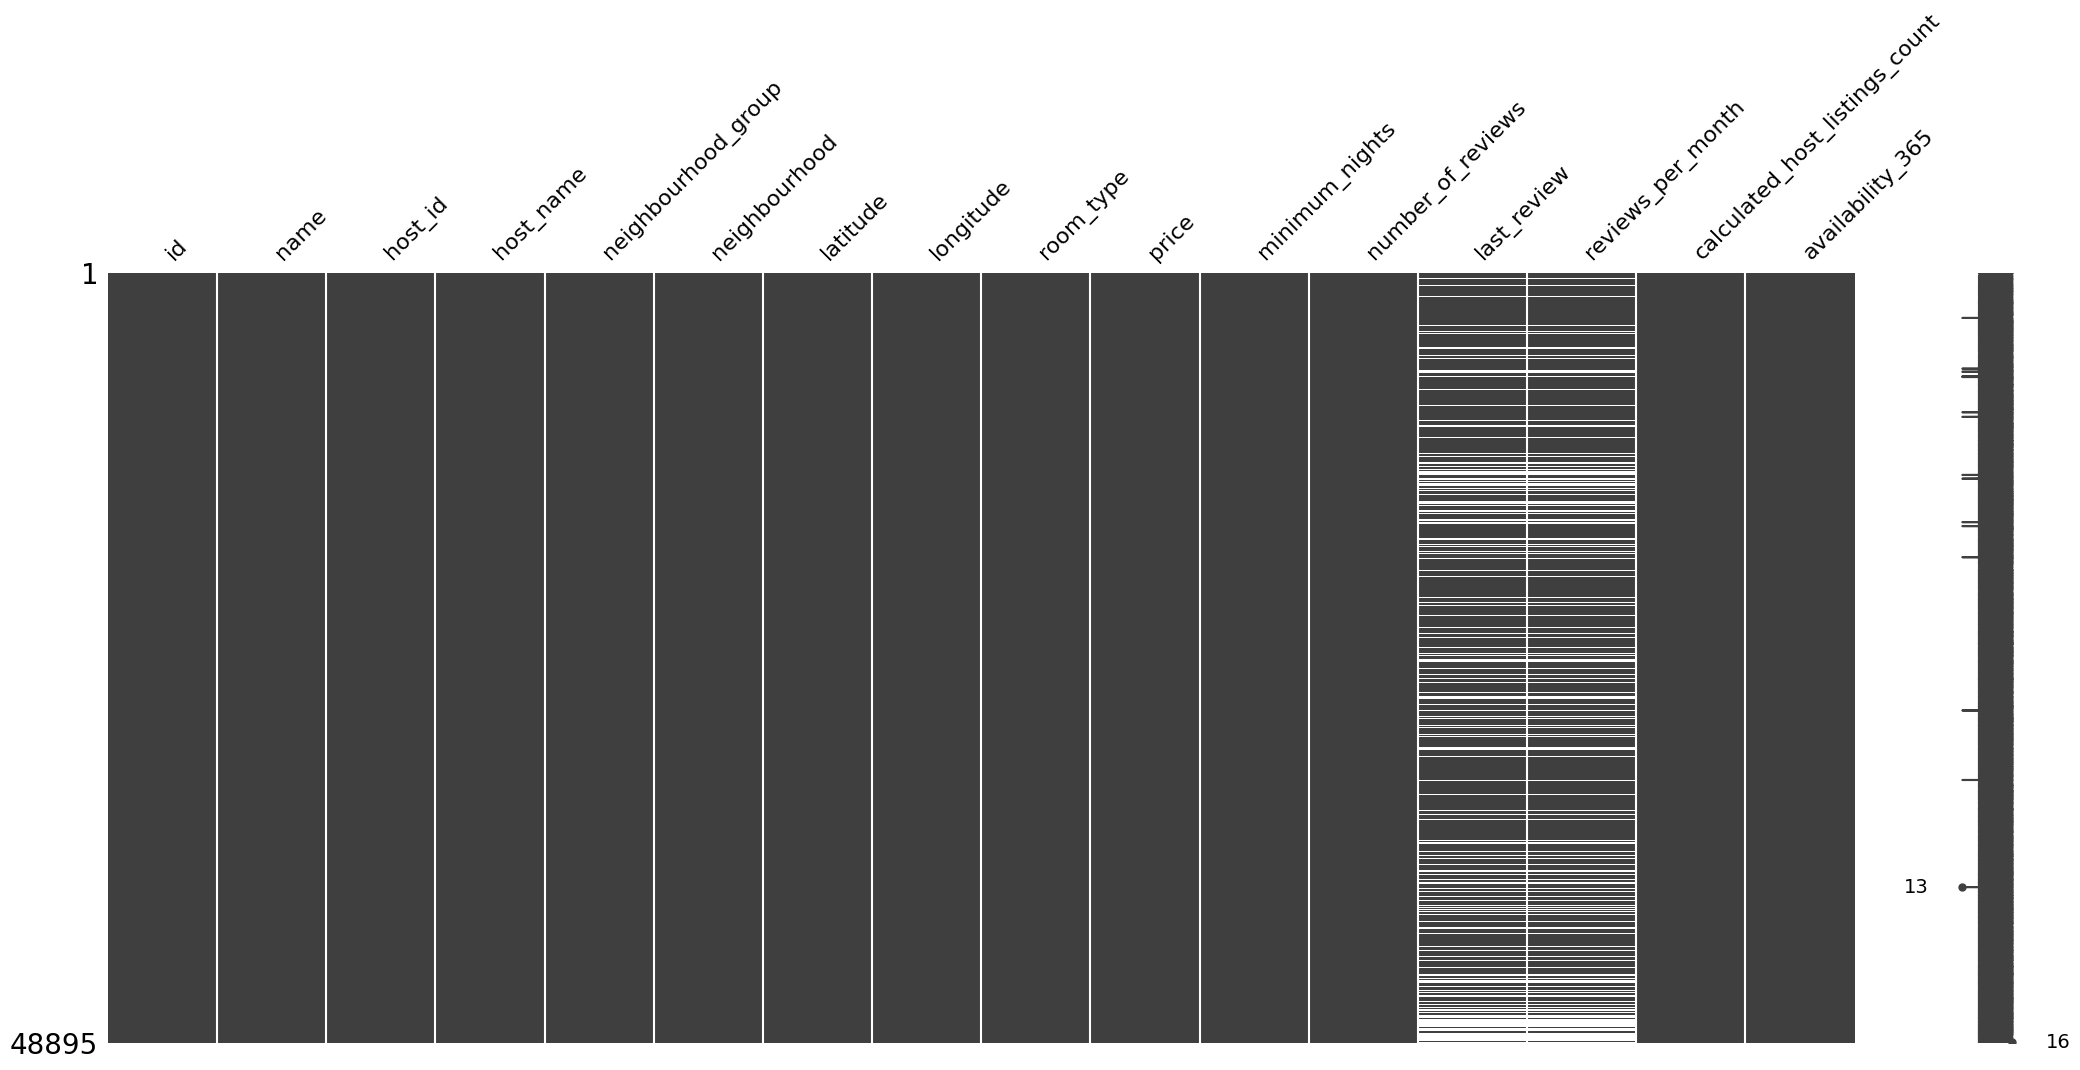

In [ ]:
msno.matrix(dataset)

### What did you know about your dataset?

* Dataset consiste 48895 rows and 16 columns.
* It has 10 Numerical and 6 object(categorical/String) columns.
* All columns are in proper format.
*It has 0 duplicated values.
*Columns 'name, host_name, last_review and review_per_month' have null/Missing values.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Dataset Describe
dataset[['price', 'minimum_nights',	'number_of_reviews',	'reviews_per_month',	'calculated_host_listings_count',	'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

The dataset contains some Miss-enteries, since column 'price' have some 0 value entries.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in dataset.columns:
  print(f'{col} : {len(dataset[col].unique())}')

id : 48895
name : 47906
host_id : 37457
host_name : 11453
neighbourhood_group : 5
neighbourhood : 221
latitude : 19048
longitude : 14718
room_type : 3
price : 674
minimum_nights : 109
number_of_reviews : 394
last_review : 1765
reviews_per_month : 938
calculated_host_listings_count : 47
availability_365 : 366


In [ ]:
for col in ['neighbourhood_group', 'room_type', 'calculated_host_listings_count']:
  print(f'{col} : {dataset[col].unique()}')
  print(' ')

neighbourhood_group : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
 
room_type : ['Private room' 'Entire home/apt' 'Shared room']
 
calculated_host_listings_count : [  6   2   1   4   3   5   7  13  28  11   8   9  52  18  15  19  10  39
  26  29  12  21  96  14  34  43 121  37  49  31  91  16  87  33  23  50
  20  25 232  17  47 103  65  30  27 327  32]
 


## 3. ***Data Wrangling***

### Data Wrangling Code

#### Handling Null Values

In [ ]:
df = dataset.copy()

In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df['name'].fillna('unknown', inplace=True)
df['host_name'].fillna('unknown', inplace=True)

In [ ]:
df[['name', 'host_name']].isna().sum()

name         0
host_name    0
dtype: int64

In [ ]:
df.drop(['last_review'], axis=1,  inplace=True)

In [ ]:
df['reviews_per_month'].fillna(0, inplace=True)

In [ ]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df = df[['name', 'host_name', 'neighbourhood_group',	'neighbourhood',	'latitude', 'longitude',	'room_type', 'price',	'minimum_nights',	'number_of_reviews',	'reviews_per_month',	'calculated_host_listings_count',	'availability_365']]

####Data Correction

summarization of the price data.

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

After have a quick summary of the price data. it is clear that the Price ranges from  0−180. But there also exists price which has a maximum of $10000. This we cannot discard as an outlier because there are many scenarios in which price differs. The price varies on different factors which includes location,room type, neighbourhood , season etc. Also, we can see there are few values with 0, which can be due to dynamic pricing or the willingness of not to share the price with the Airbnb.

In [ ]:
df.loc[df['price']==0].shape

(11, 13)

As the Price column has very few observations with a 0 value, we can replace them with the median price of their respective areas.

In [ ]:
df.loc[(df['price']== 0) & (df['neighbourhood'] == 'Bedford-Stuyvesant'), 'price'] = df.loc[df['neighbourhood'] == 'Bedford-Stuyvesant', 'price'].median()

In [ ]:
df.loc[(df['price']== 0) & (df['neighbourhood'] == 'East Morrisania'), 'price'] = df.loc[df['neighbourhood'] == 'East Morrisania', 'price'].median()
df.loc[(df['price']== 0) & (df['neighbourhood'] == 'Bushwick'), 'price'] = df.loc[df['neighbourhood'] == 'Bushwick', 'price'].median()
df.loc[(df['price']== 0) & (df['neighbourhood'] == 'Greenpoint'), 'price'] = df.loc[df['neighbourhood'] == 'Greenpoint', 'price'].median()
df.loc[(df['price']== 0) & (df['neighbourhood'] == 'Williamsburg'), 'price'] = df.loc[df['neighbourhood'] == 'Williamsburg', 'price'].median()
df.loc[(df['price']== 0) & (df['neighbourhood'] == 'Murray Hill'), 'price'] = df.loc[df['neighbourhood'] == 'Murray Hill', 'price'].median()

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.741170
std        240.145606
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### What all manipulations have you done and insights you found?

* I replace Null values of 'name' and 'host_name' columns with 'unknown' value.
* I replace Null values of 'reviews_per_month' with 0.
* I drop unwanted columns ( 'id', 'host_id', 'last_review')
* Replcae 0 value of price column with median values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Top 10 Hosts

In [ ]:
top_10_host = df.value_counts('host_name')[:10]

In [ ]:
top_10_host = top_10_host.sort_values()

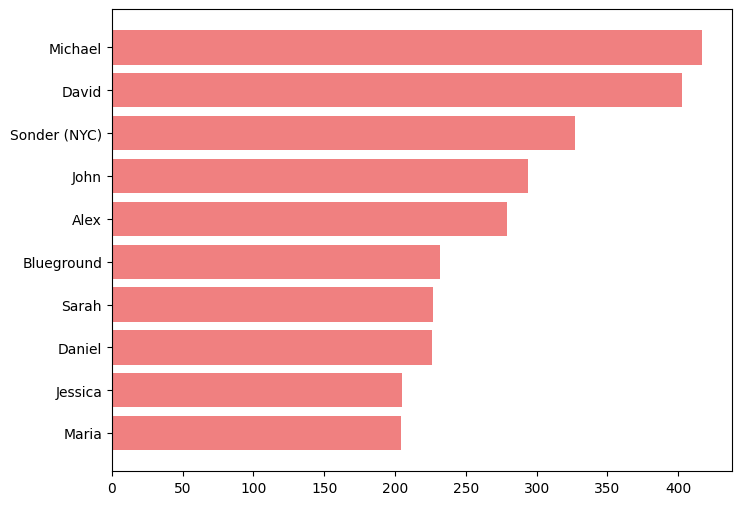

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
x = top_10_host.values
y = top_10_host.index
ax.barh(y, x, color='lightcoral')
plt.show()

##### 1. Why did you pick the specific chart?

When we need to show the frequency, ranking, or comparison of categories, a horizontal bar chart is a helpful tool.

##### 2. What is/are the insight(s) found from the chart?

In the chart above, we can observe the top 10 hosts with the highest number of listeners.

#### Chart - 2

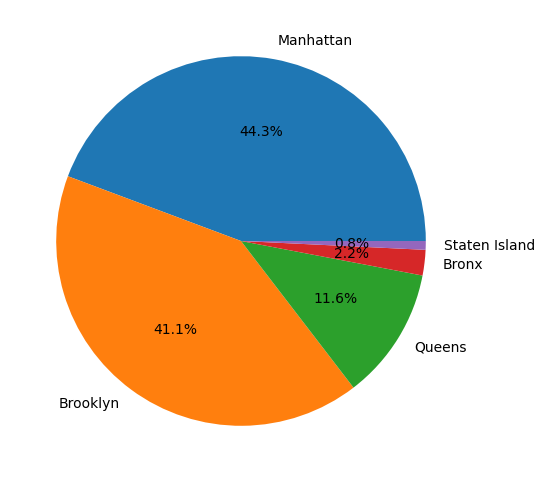

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
x = df['neighbourhood_group'].value_counts().values
label_ls = df['neighbourhood_group'].value_counts().index
ax.pie(x, labels=label_ls, autopct='%1.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

 A pie chart is a useful tool for presenting the percentage distribution of different categories in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Based on the pie chart, we can observe the percentage breakdown of the different neighborhood groups. In the groups that have a lower percentage, people may be less aware of Airbnb, resulting in higher listing prices for those neighborhoods.

#### Chart - 3

In [ ]:
room_type = df.value_counts('room_type')

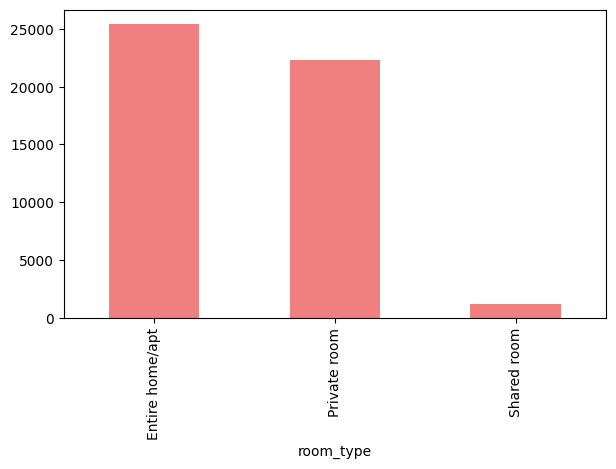

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
room_type.plot(kind='bar', ax=ax, color='lightcoral')
plt.show()

##### 1. Why did you pick the specific chart?

When we need to show the frequency, ranking, or comparison of categories, a bar chart is a helpful tool.

##### 2. What is/are the insight(s) found from the chart?

From the above its clear the Apartment and Private data is more than that of shared rooms. In general, Shared rooms costs less and can be very useful for travellers who moves from one city to another city quite frequently. Though the shared rooms data is less, we will still try to uncover as much details as we can

#### Chart - 4

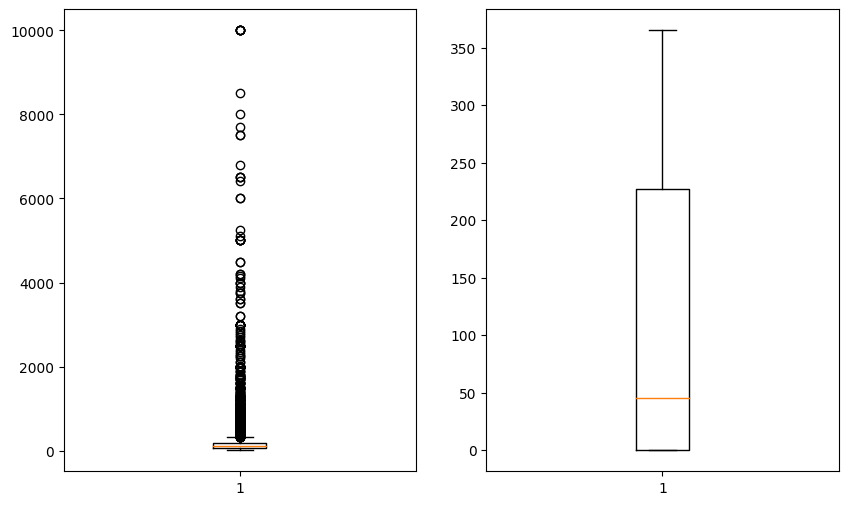

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].boxplot(df['price'])
ax[1].boxplot(df['availability_365'])
plt.show()
plt.ioff()

##### 1. Why did you pick the specific chart?

 Box plots provide a visual representation of the quartiles (25th, 50th, and 75th percentiles), Outliers or Skewness of the dataset. This helps in understanding the spread of the data and the central tendency.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the plots, it is clear that the price data does not follow a normal distribution. This variation in price can be attributed to several factors, including location, room type, neighborhood, and season.

On the other hand, the availability of data throughout the year mostly lies between 25 to 225.

#### Chart - 5

In [ ]:
points = list(zip(df['latitude'], df['longitude']))

In [ ]:
hosts_clust = folium.Map(location=(df['latitude'].mean(), df['longitude'].mean()),tiles="cartodb positron", width='80%', height='80%')
FastMarkerCluster(data=points).add_to(hosts_clust)
hosts_clust

##### 1. Why did you pick the specific chart?

Map can be zoomed and the individual locations can be viewed in detail.

##### 2. What is/are the insight(s) found from the chart?

Since according to the dataset we have been provided with the latitude and longitude so we will use folium libraries to present the data into a map. This map can be zoomed and the individual locations can be viewed in detail.

#### Chart - 6

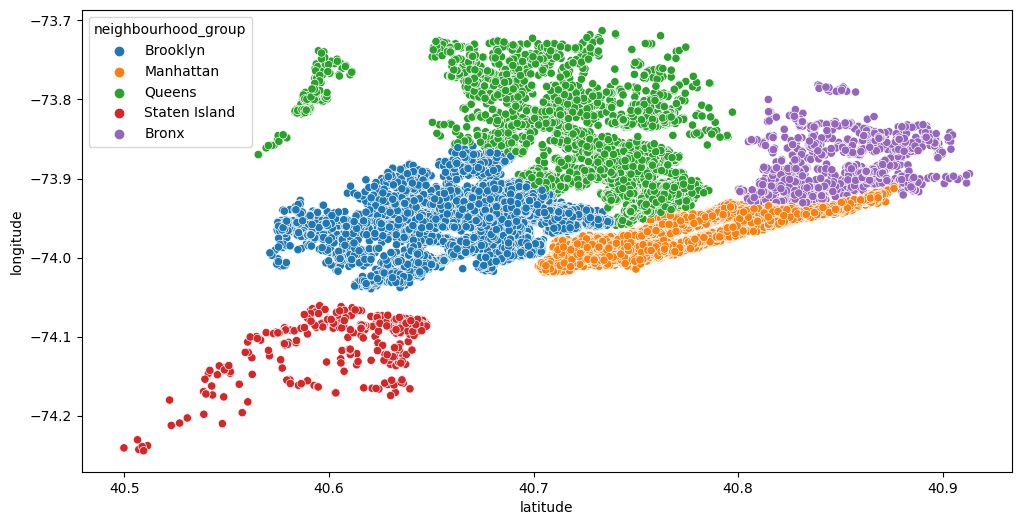

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(ax =ax, x='latitude', y='longitude', hue='neighbourhood_group', data=df)
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots can reveal natural groupings or clusters within the data, providing insights into different subpopulations or categories.

##### 2. What is/are the insight(s) found from the chart?

We will plot the same latitude and longitude in a scatter plot to have the cluster of the location, the same we did with the folium maps.

#### Chart - 7

In [ ]:
room_type_size = df.groupby(['neighbourhood_group', 'room_type']).size().unstack()
room_type_avg_price = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()

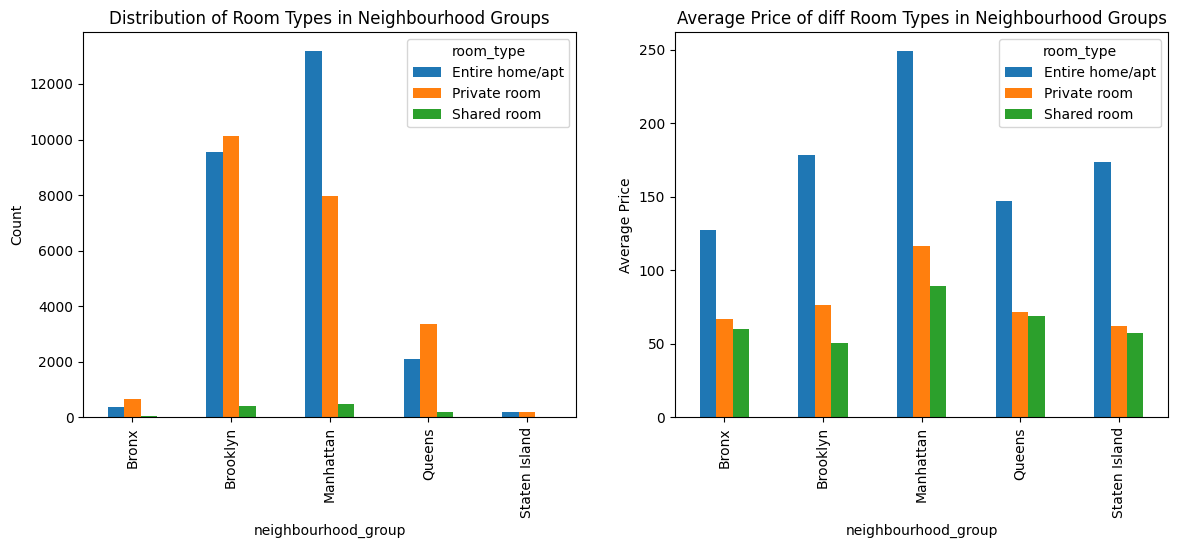

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
room_type_size.plot(kind='bar', ax=ax[0])
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Room Types in Neighbourhood Groups')
room_type_avg_price.plot(kind='bar', ax=ax[1])
ax[1].set_ylabel('Average Price')
ax[1].set_title('Average Price of diff Room Types in Neighbourhood Groups')
plt.show()

##### 1. Why did you pick the specific chart?

When we need to show the frequency, ranking, or comparison of categories, a bar chart is a helpful tool.

##### 2. What is/are the insight(s) found from the chart?

In the plots above, we can observe that the number of private rooms is considerably low across all neighborhood groups. Furthermore, some neighborhood groups have a higher number of private rooms, while others have a higher number of entire home/apartment listings. This could be due to the location and the preferences of the people travel in those areas.

Also by the 'Average Price of diff Room Types in Neighbourhood Groups' plot we the average price of the different room types in different neighborhood_Group.

#### Chart - 8

Top 10 Private Room Listeners

In [ ]:
private_rooms = df[df['room_type'] == 'Private room']
Top10_private_room_listeners = private_rooms.groupby(['host_name']).size().sort_values(ascending=False)
Top10_private_room_listeners = Top10_private_room_listeners[:10]

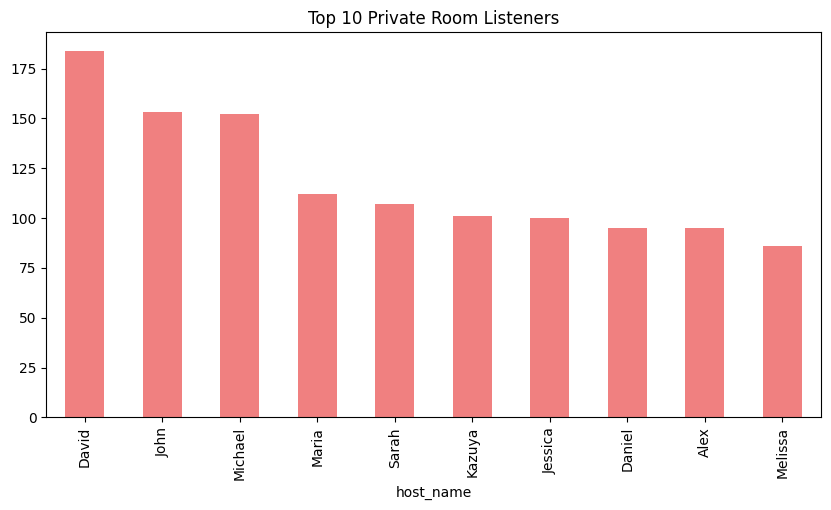

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
Top10_private_room_listeners.plot(kind='bar', ax=ax, color='lightcoral')
ax.set_title('Top 10 Private Room Listeners')
plt.show()

Top 10 Apartment Listeners

In [ ]:
apartment = df[df['room_type'] == 'Entire home/apt']
Top10_apt_listeners = apartment.groupby(['host_name']).size().sort_values(ascending=False)
Top10_apt_listeners = Top10_apt_listeners[:10]

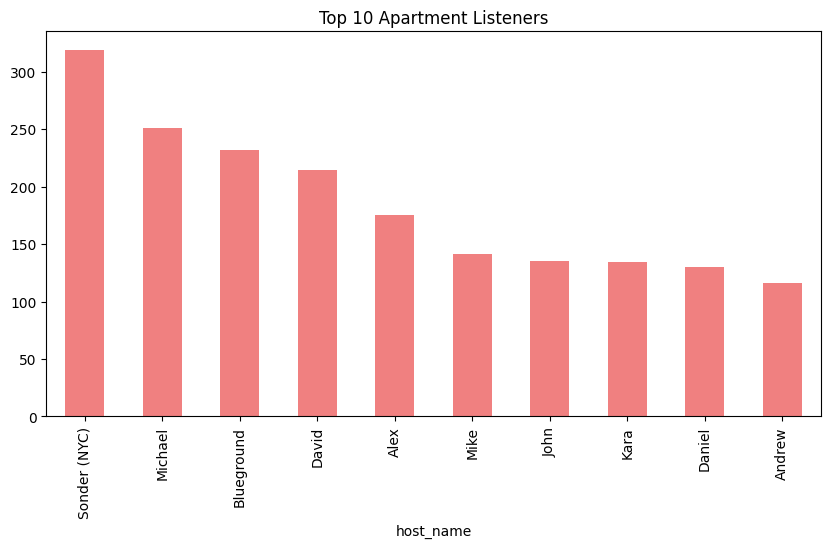

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
Top10_apt_listeners.plot(kind='bar', ax=ax, color='lightcoral')
ax.set_title('Top 10 Apartment Listeners')
plt.show()

Top 10 Shared Room Listeners

In [ ]:
shared_rooms = df[df['room_type'] == 'Shared room']
Top10_shared_room_listeners = shared_rooms.groupby(['host_name']).size().sort_values(ascending=False)
Top10_shared_room_listeners = Top10_shared_room_listeners[:10]

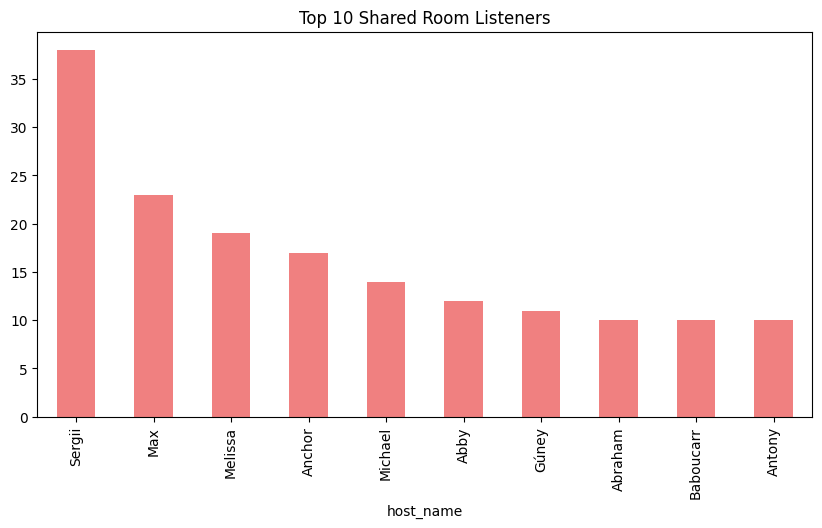

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
Top10_shared_room_listeners.plot(kind='bar', ax=ax, color='lightcoral')
ax.set_title('Top 10 Shared Room Listeners')
plt.show()

##### 1. Why did you pick the specific chart?

When we need to show the frequency, ranking, or comparison of categories, a bar chart is a helpful tool.

##### 2. What is/are the insight(s) found from the chart?

In the above plots we see the Top 10 hosts in different Room type.

#### Chart - 9

In [ ]:
expensive_location = df.groupby(['neighbourhood_group'])['price'].mean().sort_values()

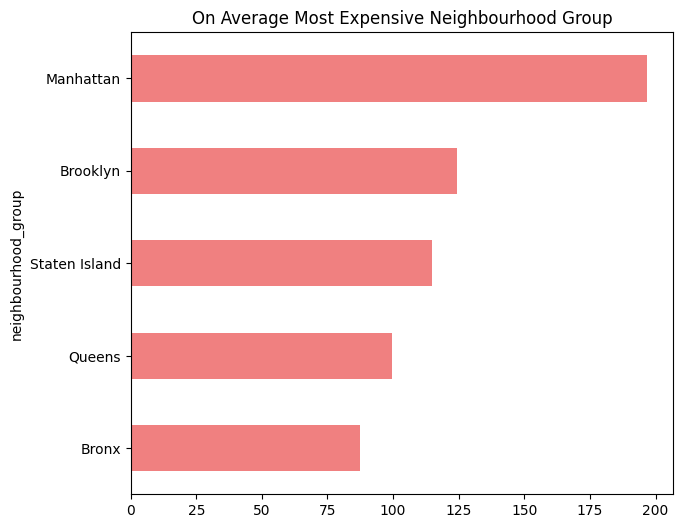

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
expensive_location.plot(kind='barh', ax = ax, color='lightcoral')
ax.set_title('On Average Most Expensive Neighbourhood Group')
plt.show()

##### 1. Why did you pick the specific chart?

When we need to show the frequency, ranking, or comparison of categories, a horizontal bar chart is a helpful tool.

##### 2. What is/are the insight(s) found from the chart?

In Above plot We ranked the neighborhood groups based on their average prices.

#### Chart - 10

Top 10 Most Expensive Locality Area

In [ ]:
top10_expansive_area = df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

In [ ]:
top10_expansive_area = top10_expansive_area.sort_values()

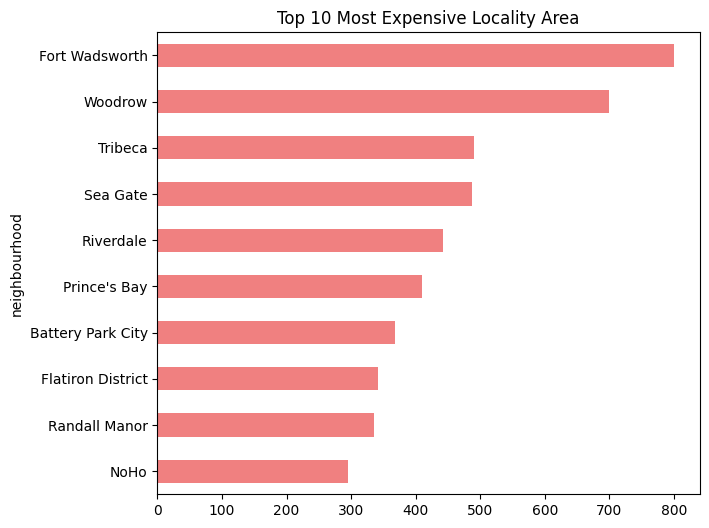

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
top10_expansive_area.plot(kind='barh', ax = ax, color='lightcoral')
ax.set_title('Top 10 Most Expensive Locality Area')
plt.show()

Top 10 Least Expensive Locality Area

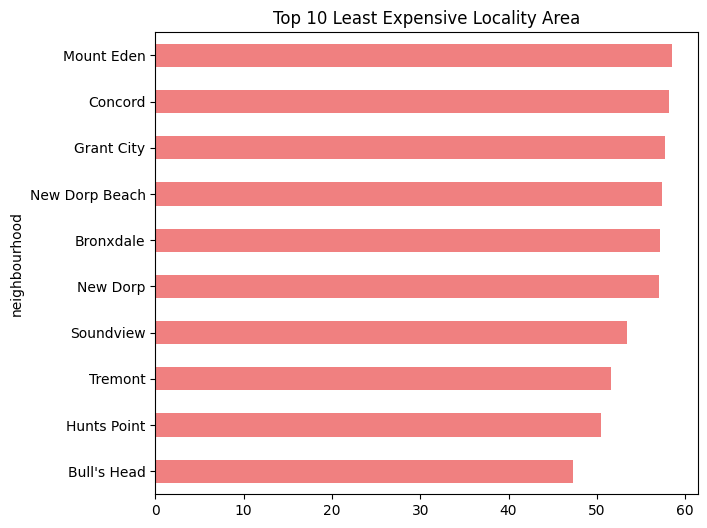

In [ ]:
top10_least_area = df.groupby(['neighbourhood'])['price'].mean().sort_values()[:10]
fig, ax = plt.subplots(figsize=(7, 6))
top10_least_area.plot(kind='barh', ax = ax, color='lightcoral')
ax.set_title('Top 10 Least Expensive Locality Area')
plt.show()

##### 1. Why did you pick the specific chart?

When we need to show the frequency, ranking, or comparison of categories, a horizontal bar chart is a helpful tool.

##### 2. What is/are the insight(s) found from the chart?

This is very much important in terms of price to understand which locality has the highest price margin, So in the plots we presents Top 10 neighbourhood and Bottom 10 neighbourhood  with respect to Average Price. This will help a traveller to choose the appropriate neighbourhood based on his budget
So according to the below plot Fort Wadsworth is the most expensive in terms of neighbourhood. Whereas Bull's head locality is the least expensive to stay.

#### Chart - 11

Most number of locality listed

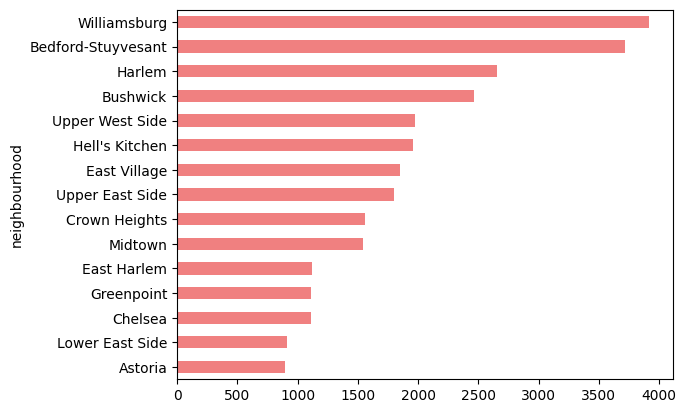

In [ ]:
most_listed_locality = df.groupby(['neighbourhood']).size().sort_values(ascending=False)[:15]
most_listed_locality = most_listed_locality.sort_values()
most_listed_locality.plot(kind='barh', color='lightcoral')
plt.show()

Least number of locality listed

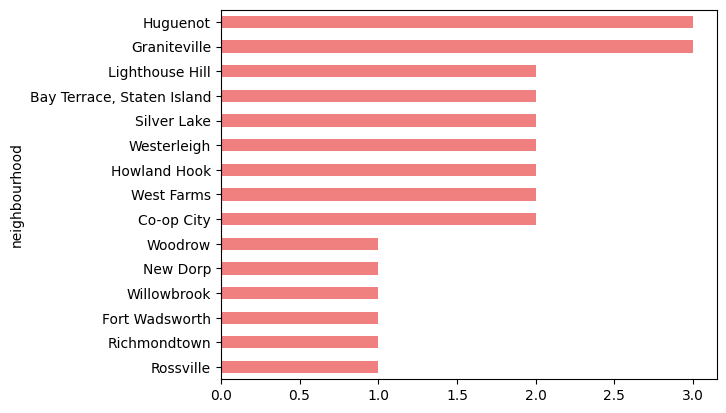

In [ ]:
least_listed_locality = df.groupby(['neighbourhood']).size().sort_values()[:15]
least_listed_locality.plot(kind='barh', color='lightcoral')
plt.show()

##### 1. Why did you pick the specific chart?

When we need to show the frequency, ranking, or comparison of categories, a horizontal bar chart is a helpful tool.

##### 2. What is/are the insight(s) found from the chart?

In the above we figure out how many number of neighbourhood has been posted based on the count. We can see Williamsburg has most number of listing count

where as Rossville has one of the least listing i.e 1.

If we recall this neighbourhood is one of the highest stay based on price so this can be one of the reason that the price is increased due to the less number of listing.

#### Chart - 12

Average room rent for locality

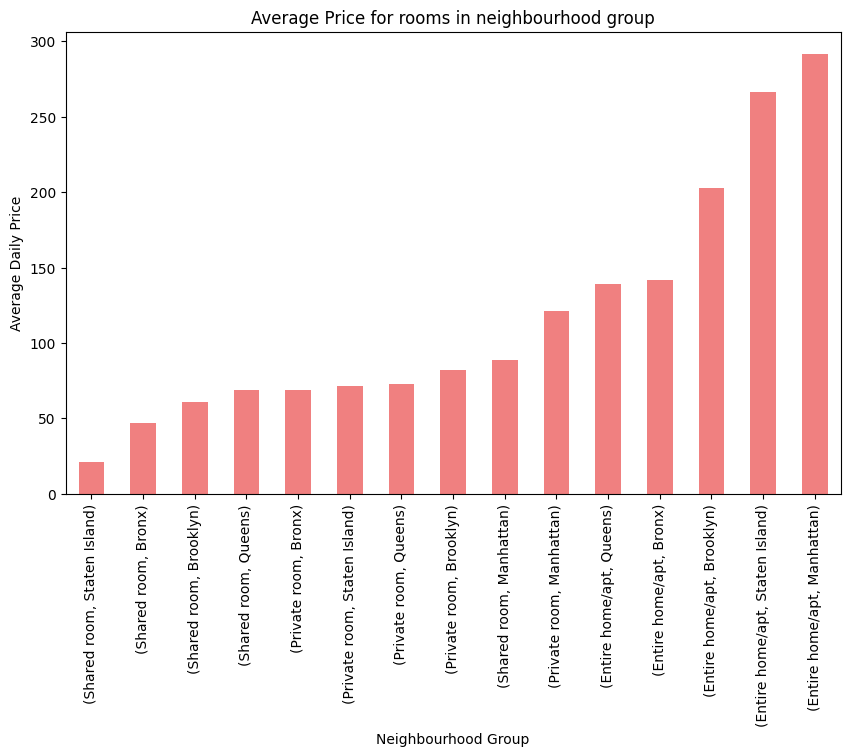

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.789742
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [ ]:
plt.figure(figsize=(10,6))
data = df[df['minimum_nights']==1]
df1 = data.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar',  color='lightcoral')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

##### 1. Why did you pick the specific chart?

When we need to show the frequency, ranking, or comparison of categories, a horizontal bar chart is a helpful tool.

##### 2. What is/are the insight(s) found from the chart?

For any traveller, the most important thing is the price since this sets the budget of his/her trip. So in the below we will figure out what is the average price per night. We will check for different room type and based on neighbourhood group to figure out what is the average per night stay.

So looking at the plot it is clear :

a. Shared room at staten Island is the most cheapest stay per night whereas Renting a Entire apartment/Home at Manhattan per night is the most expensive.

b. Average price for Private room is also considerably expensive at manhattan so is the shared room at Manhattan is expensive than other private rooms of the neighbourhood. This clearly states that Manhattan is the expensive stay than any other locality.

c. Bronx is the most cheapest stay in terms of neighbourhood group comparison in respect to room type.

d. Though Shared room at Staten Island is the cheapest whereas Apartment renting is not cheapest at Staten Island. This can be due to the location of a perfect gateway from the rush of the city for a quality time with family get together.

We will also list out the average price for each type of room per neighbourhood so that tourists can plan based on the budget.

#### Chart - 13

Location and Review Score

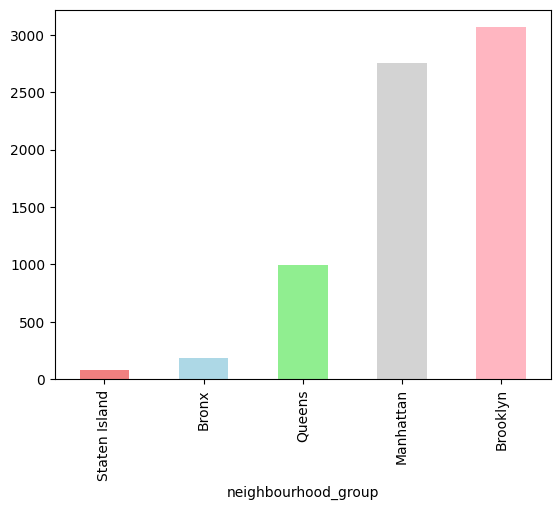

 
Count of Review v/s neighbourhood group
 


,number_of_reviews
neighbourhood_group,
Staten Island,81
Bronx,187
Queens,997
Manhattan,2751
Brooklyn,3065


In [ ]:
review_50 = df[df['number_of_reviews']>=50]
review_score = review_50.groupby(['neighbourhood_group'])['number_of_reviews'].count().sort_values()
review_score.plot(kind='bar', color=['lightcoral', 'lightblue', 'lightgreen','lightgray', 'lightpink'])
plt.show()
print(' ')
print('Count of Review v/s neighbourhood group')
print(' ')
pd.DataFrame(review_score)

##### 1. Why did you pick the specific chart?

When we need to show the frequency, ranking, or comparison of categories, a  bar chart is a helpful tool.

##### 2. What is/are the insight(s) found from the chart?

Review is the one of the important criteria with online activity these days. This gives a lot of insights to a particular place for tourist and they can swing mood when it comes to online booking. A cheap place with bad review can drive a tourist for not booking and an expensive place with nicest review can shell a tourist more than what he have thought initially. So we will try to figure out the review , how each neighbourhood is doing in respect to review. Since there is a limited data with review we will try to figure out as much as we can.

First criteria of our review is we will consider only those who have a review more than 50, so that we can have an insight of the data.

So according to the below plot, Brooklyn got most review in comparison to Manhattan and that is an interesting find. Also Staten Island which is cheaper has less review than the other neighbourhood group. We cannot proceed further to understand why is that case since we have a limited data.

#### Chart - 14

Top 5 host

In [ ]:
top_hosts = review_50.groupby(['host_name'])[['number_of_reviews', 'latitude', 'longitude']].agg({'number_of_reviews': 'count', 'latitude': 'mean', 'longitude': 'mean'}).sort_values(by='number_of_reviews', ascending=False)[0:5]

In [ ]:
top_hosts

,number_of_reviews,latitude,longitude
host_name,,,
Michael,64,40.721945,-73.955725
David,48,40.725678,-73.962102
John,44,40.740590,-73.959620
Alex,44,40.713140,-73.966923
Jason,38,40.693340,-73.962916


In [ ]:
points = list(zip(top_hosts['latitude'], top_hosts['longitude']))
top_host_map = folium.Map(location=(top_hosts['latitude'].mean(), top_hosts['longitude'].mean()),tiles="cartodb positron", zoom_start=12)
FastMarkerCluster(data=points).add_to(top_host_map)
top_host_map

##### 2. What is/are the insight(s) found from the chart?

Based on the review score(Minimum 50) i plot, who is our top 5 Host, this increases the confidence of tourist before booking.

Also i plot host loclity based on their lattitude and location of our review data.

It looks like Michael has received more reviews.

#### Chart - 15

Availability and Price Relation

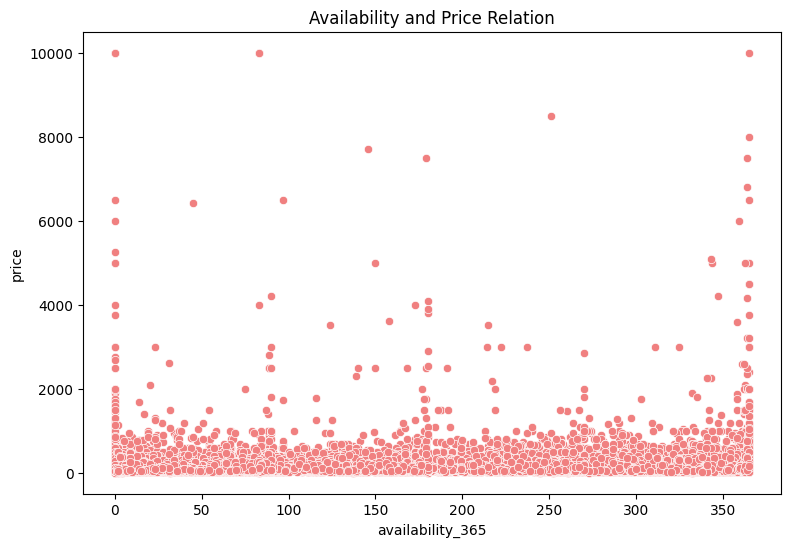

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='availability_365', y='price', data=df, ax=ax, c='lightcoral')
ax.set_title('Availability and Price Relation')
plt.show()

##### 1. Why did you pick the specific chart?

 Scatter plots are great for assessing the correlation or relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

In above We plot a scatterplot to understand if there is any price increase based on the availability and looking above the plot its hardly to infer. But looks like with availability with 365 the price increases to 10K.

#### Chart - 16 Correlation Heatmap

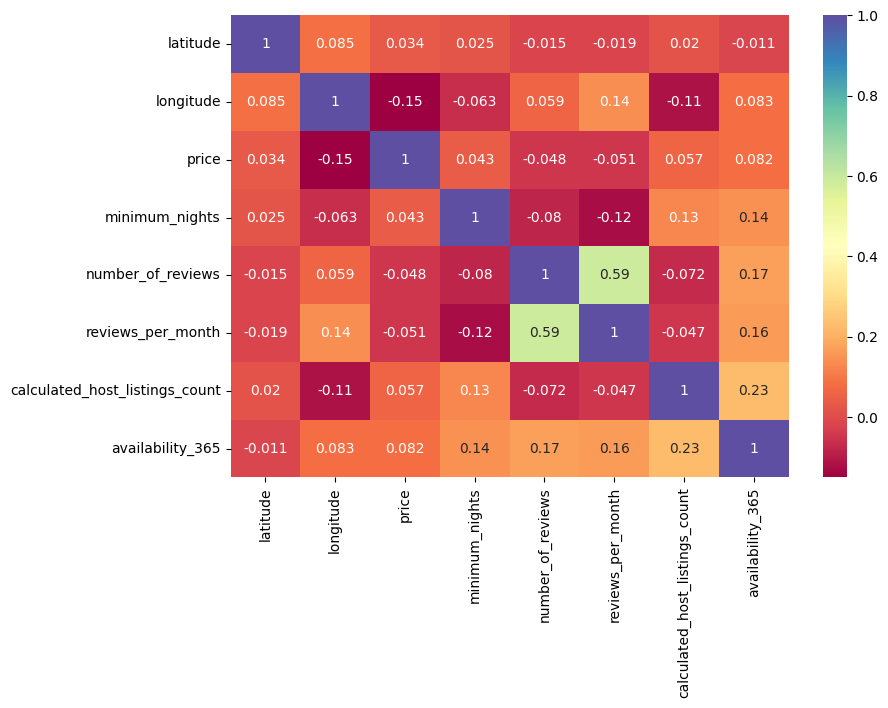

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), ax=ax, annot=True, cmap='Spectral')
plt.show()

##### 1. Why did you pick the specific chart?

 Heatmaps are frequently used to visualize correlation matrices. When dealing with multiple variables, a heatmap can show the strength and direction of the correlations between pairs of variables. Darker colors may represent stronger correlations, while lighter colors indicate weaker or no correlations

##### 2. What is/are the insight(s) found from the chart?

In the heatmap above, we can observe a high correlation between the columns 'review_per_month' and 'number_of_review'. This is natural since a listener with a high review per month ratio will also have a higher number of reviews.

On the other hand, the correlation between other variables is very weak..

#### Chart - 15 - Pair Plot

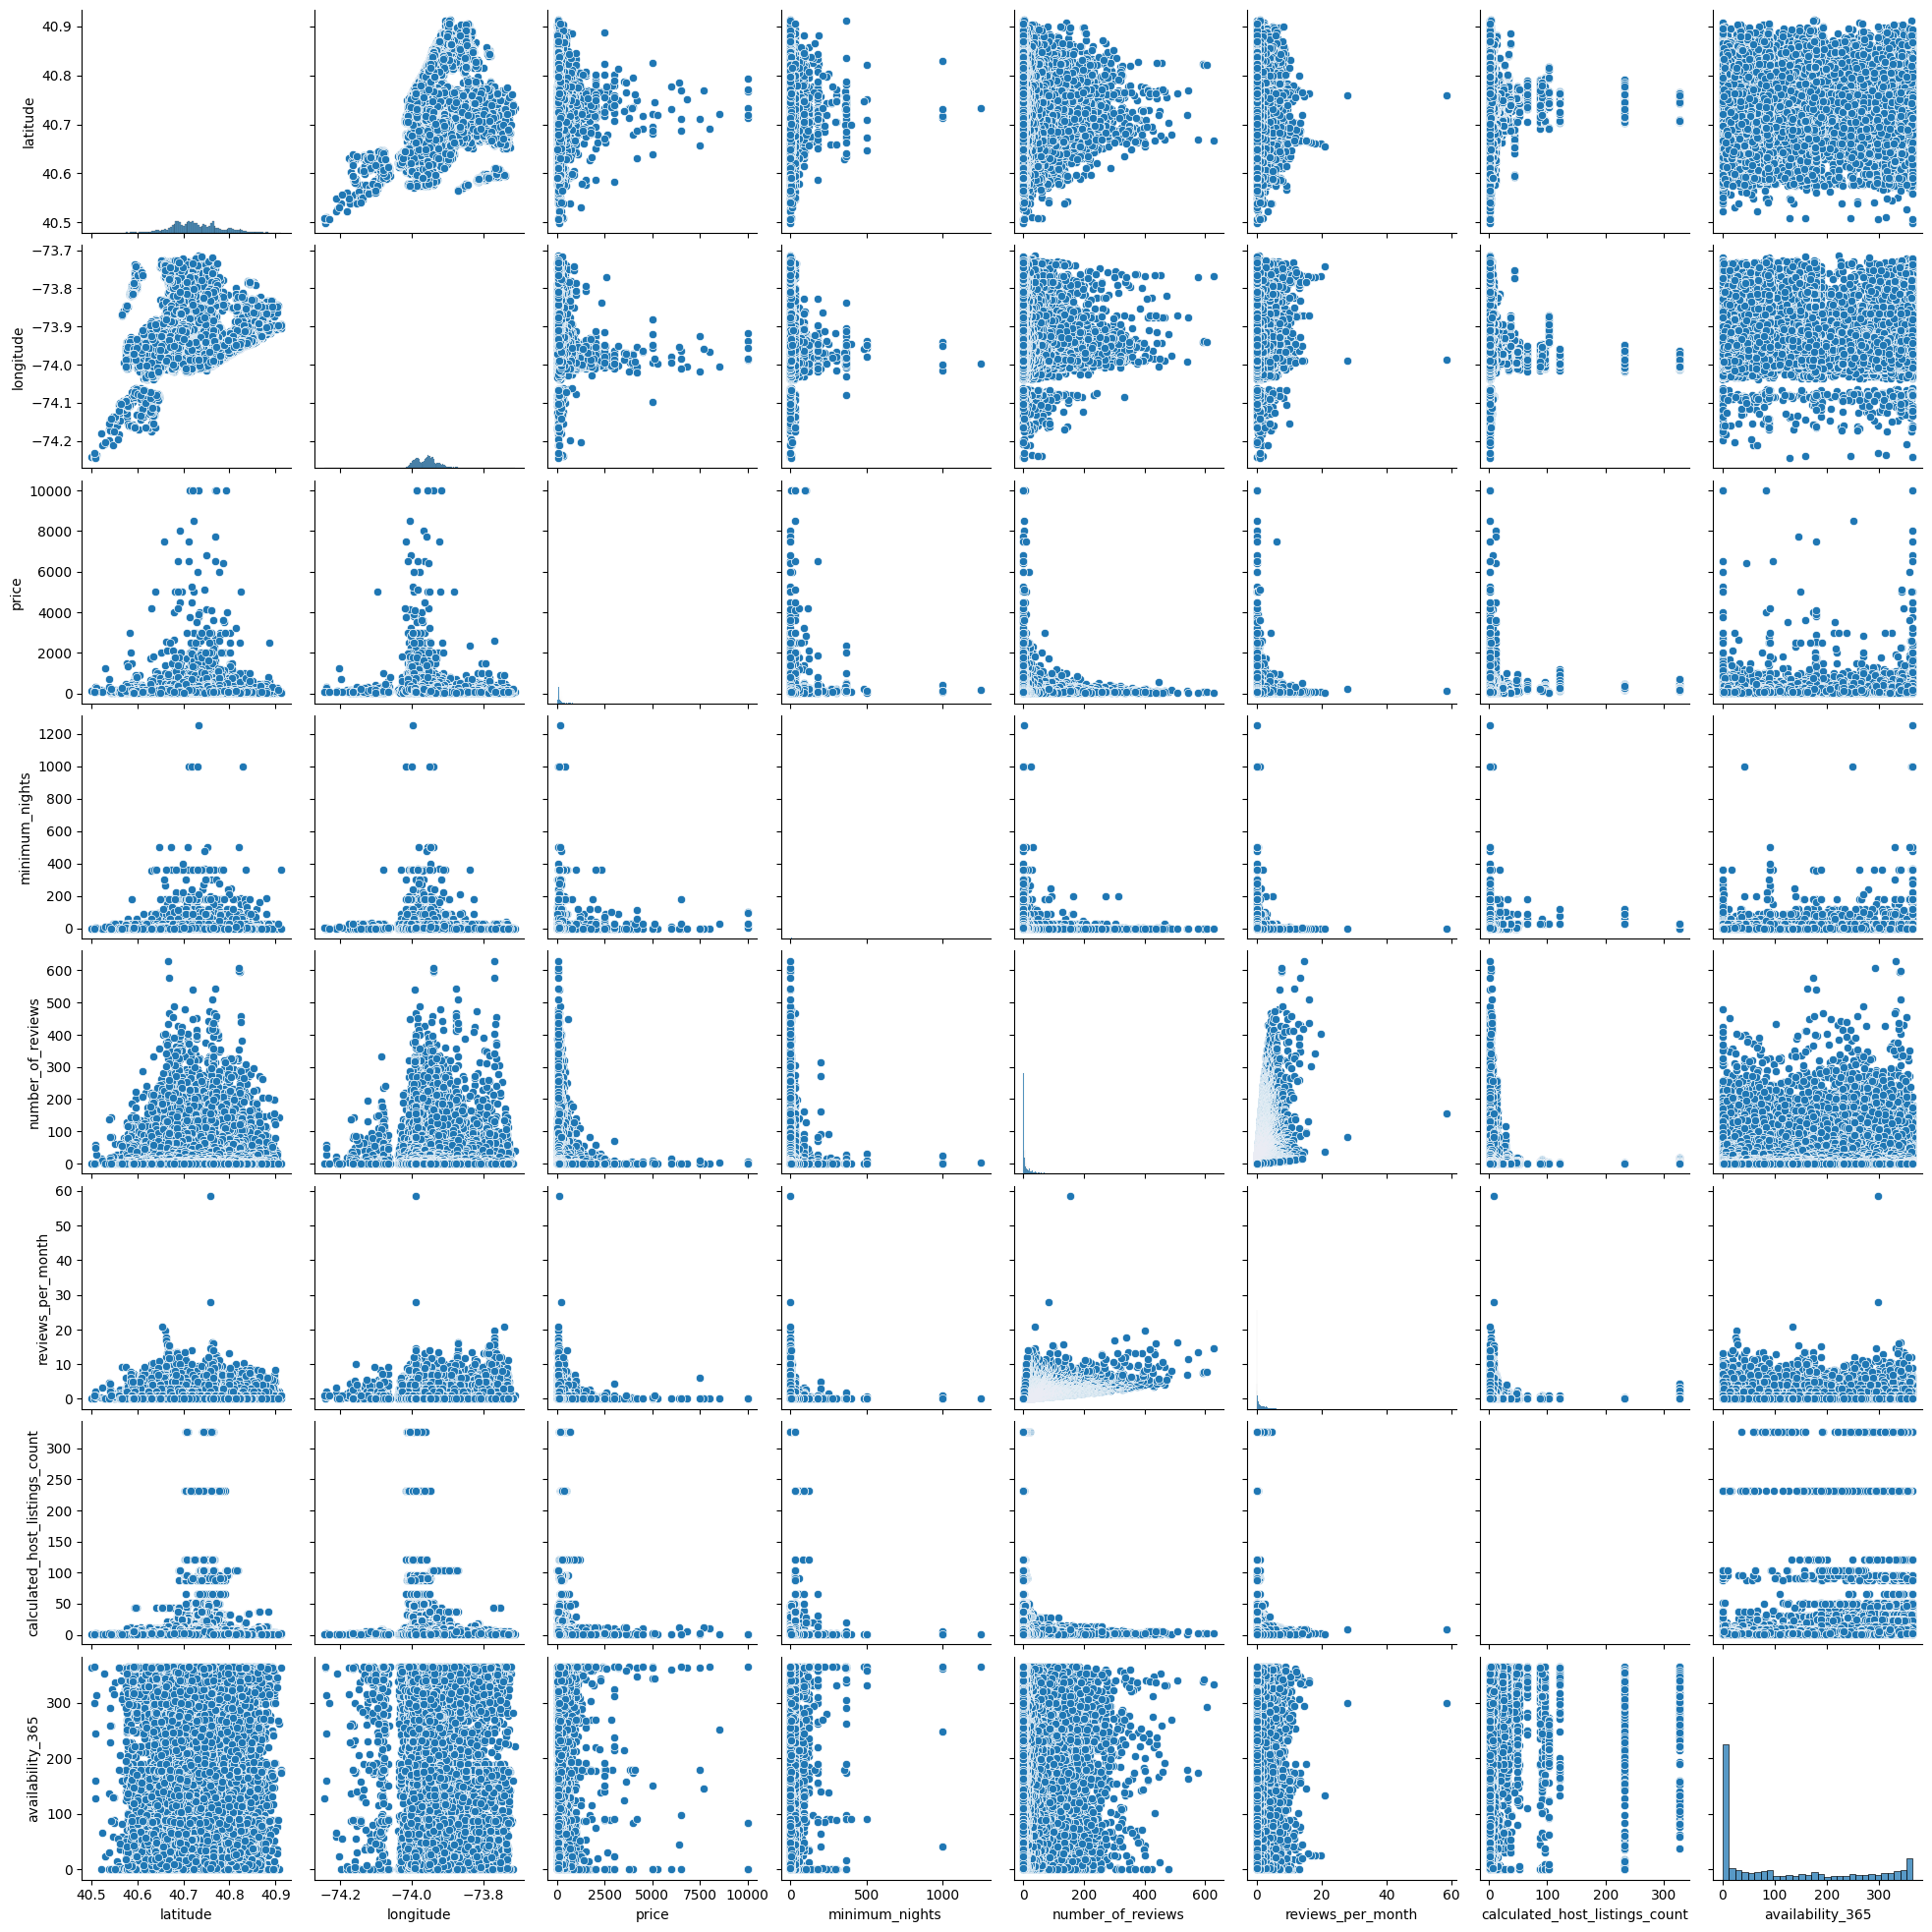

In [ ]:
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

A Pairplot is a type of visualization that shows scatterplots for all pairs of numerical features in a dataset along with histograms on the diagonal for individual variables. It's particularly useful for exploring relationships between multiple variables simultaneously.

Pairplots can help you visually assess the correlation between different pairs of variables. If variables are correlated, you may observe a discernible pattern in the scatterplots.

##### 2. What is/are the insight(s) found from the chart?

the chart suggests that there is a general relationship between the price of an Airbnb listing and the number of reviews it has. However, there is also a lot of variation in the data, and there are a few outliers. This suggests that the number of reviews is not the only factor that determines the price of an Airbnb listing. Other factors, such as the location, amenities, and host reputation, may also play a role.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

* Maharashtra and Bengaluru have the highest demand for Airbnb rentals as evidenced by the large number of listings in these neighborhoods. This could make them attractive areas for host to invest in property.

Manhattan is world-famous for its parks, museums, buildings, town, liberty, gardens, markets, island and also its substantial number of tourists throughout the year it makes sense that demand and price both high.

Manhattan is world-famous for its parks, museums, buildings, town, liberty, gardens, markets, island and also its substantial number of tourists throughout the year it makes sense that demand and price both high.

* Brooklyn comes in second with significant number of listings and cheaper prices as compared to the Manhattan: With most listings located in Williamsburg and Bedford Stuyvesant two neighborhoods strategically close to Manhattan tourists get the chance to enjoy both boroughs equally while spending less.

* Williamsburg, Bedford-Stuyvesant, Harlem, Bush wick, and the Upper West Side are the top neighborhoods in terms of listing counts, indicating strong demand for Airbnb rentals in these areas.

* The average price of a listing in New York City is higher in the center of the city (Manhattan) compared to the outer boroughs. This could indicate that investing in property in Manhattan may be more lucrative for Airbnb rentals. But Manhattan and Brooklyn have the largest number of hosts, indicating a high level of competition in these boroughs.

 * Average price for Private room is also considerably expensive at manhattan so is the shared room at Manhattan is expensive than other private rooms of the neighbourhood. This clearly states that Manhattan is the expensive stay than any other locality.

 * Bronx is the most cheapest stay in terms of neighbourhood group comparison in respect to room type.

 * Though Shared room at Staten Island is the cheapest whereas Apartment renting is not cheapest at Staten Island. This can be due to the location of a perfect gateway from the rush of the city for a quality time with family get together.